<center style="font-size: 30px;">Lab4</center>

вибрати з дз 3 два кластера з найбільшою кількістю елементів.
класифікувати методом опорних векторів.
описати:
= яке ядро ви використовували і який вигляд воно має для ваших даних.
= яка точність класифікації.
= намалювати класи та розділяючу гіперлощину.


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Завантаження даних

In [10]:
data  = pd.read_csv(r"D:\programming\2024-2025\Data-analytics-methods-and-technologies\lab1\BankChurners.csv")
data .head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Вибір ознак для кластеризації

In [11]:
features = data[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']]
features

,Customer_Age,Credit_Limit,Total_Trans_Amt,Avg_Utilization_Ratio
0,45,12691.0,1144,0.061
1,49,8256.0,1291,0.105
2,51,3418.0,1887,0.000
3,40,3313.0,1171,0.760
4,40,4716.0,816,0.000
...,...,...,...,...
10122,50,4003.0,15476,0.462
10123,41,4277.0,8764,0.511
10124,44,5409.0,10291,0.000
10125,30,5281.0,8395,0.000


Масштабування даних

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.16540558,  0.4466219 , -0.95970657, -0.77588223],
       [ 0.33357038, -0.04136665, -0.91643261, -0.61627565],
       [ 0.58305837, -0.5736978 , -0.74098169, -0.99715499],
       ...,
       [-0.29014957, -0.3546256 ,  1.73299393, -0.99715499],
       [-2.03656544, -0.36870959,  1.17484807, -0.99715499],
       [-0.41489356,  0.19321995,  1.73387707, -0.31157218]])

Кластеризація методом k-середніх

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(scaled_features)
data['Cluster_KMeans']

0        2
1        2
2        2
3        0
4        2
        ..
10122    3
10123    0
10124    3
10125    2
10126    3
Name: Cluster_KMeans, Length: 10127, dtype: int32

In [14]:
# Визначення двох найбільших кластерів
cluster_counts = data['Cluster_KMeans'].value_counts()
top_clusters = cluster_counts.nlargest(2).index.tolist()

In [15]:
# Фільтрація даних для двох найбільших кластерів
filtered_data = data[data['Cluster_KMeans'].isin(top_clusters)]
filtered_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster_KMeans
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,2
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10089,720328983,Attrited Customer,52,F,5,Unknown,Married,Less than $40K,Blue,36,...,0,9611.0,0.840,7636,64,0.829,0.000,0.997100,0.002904,2
10107,713924283,Attrited Customer,61,M,0,Graduate,Single,$60K - $80K,Blue,54,...,1644,10215.0,0.866,8930,79,0.837,0.139,0.992680,0.007320,2
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,2517,12140.0,0.166,6009,53,0.514,0.172,0.996910,0.003088,2
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,0


In [16]:
# Вибір ознак та міток для класифікації
X = filtered_data[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']].values
y = filtered_data['Cluster_KMeans'].apply(lambda x: 0 if x == top_clusters[0] else 1).values

# Масштабування ознак для SVM
scaler_svm = StandardScaler()
X_scaled = scaler_svm.fit_transform(X)

# Розбиття на навчальну та тестову вибірки зі стратифікацією
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Налаштування параметрів для GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 1, 0.1, 0.01],
    'kernel': ['rbf']
}

# Навчання моделі SVM з використанням GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

# Найкращі параметри
print("Найкращі параметри:", grid.best_params_)

# Використання найкращої моделі
svm_model = grid.best_estimator_

# Прогнозування та оцінка точності
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точність класифікації: {accuracy:.2f}')

# Додаткові метрики оцінки
print(classification_report(y_test, y_pred))

Найкращі параметри: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Точність класифікації: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1402
           1       0.99      0.99      0.99       988

    accuracy                           0.99      2390
   macro avg       0.99      0.99      0.99      2390
weighted avg       0.99      0.99      0.99      2390



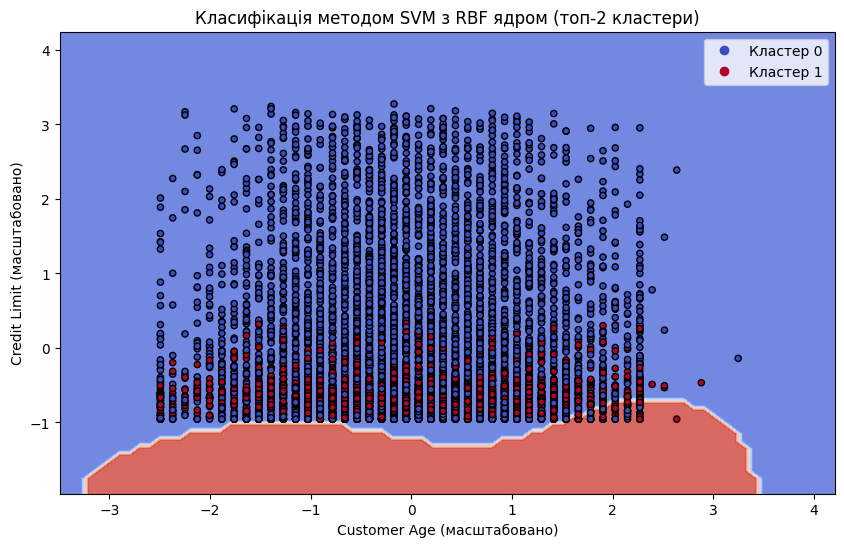

In [ ]:
# Візуалізація (для двох ознак)
# Для візуалізації виберемо дві ознаки
X_vis = filtered_data[['Customer_Age', 'Credit_Limit']].values
X_vis_scaled = scaler_svm.transform(filtered_data[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']].values)
y_vis = y  # ті ж мітки

# Обчислення середніх значень для фіксації інших ознак
mean_total_trans_amt = X_scaled[:, 2].mean()
mean_avg_util_ratio = X_scaled[:, 3].mean()

# Визначення сітки
plt.figure(figsize=(10, 6))
h = 0.1  # крок сітки

# Діапазон сітки
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Прогнозування на сітці з фіксованими ознаками
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel(),
                            np.full_like(xx.ravel(), mean_total_trans_amt),
                            np.full_like(xx.ravel(), mean_avg_util_ratio)])
Z = Z.reshape(xx.shape)

# Побудова графіка
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Відображення точок даних
scatter = plt.scatter(
    X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolors='k', marker='o', s=20, cmap=plt.cm.coolwarm
)

# Налаштування графіка
plt.xlabel('Customer Age (масштабовано)')
plt.ylabel('Credit Limit (масштабовано)')
plt.title('Класифікація методом SVM з RBF ядром (топ-2 кластери)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Кластер 0', 'Кластер 1'])
plt.show()